<a href="https://colab.research.google.com/github/abdy22/mask_detection_CNN/blob/master/mask_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
import os 

In [13]:
#scalling image pixels
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
image_size=(200,200) #resizing image size 
train_path='/content/drive/My Drive/CNN/training'
Validation_path='/content/drive/My Drive/CNN/validation'



In [16]:
train_dataset=train.flow_from_directory(train_path,
                                        target_size=image_size,
                                        batch_size=3,
                                        class_mode='binary')
validation_dataset=train.flow_from_directory(Validation_path,
                                        target_size=image_size,
                                        batch_size=3,
                                        class_mode='binary')

Found 38 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [17]:
train_dataset.class_indices

{'mask': 0, 'unmasked': 1}

In [18]:
model=tf.keras.Sequential([
                           
                           tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                           tf.keras.layers.MaxPool2D(2,2),
                           
                           tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                           tf.keras.layers.MaxPool2D(2,2),

                           tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                           tf.keras.layers.MaxPool2D(2,2),

                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(512,activation='relu'),
                           tf.keras.layers.Dense(1,activation='sigmoid')


                                                   ])

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [20]:
result=model.fit(train_dataset,
                 steps_per_epoch=10,
                 epochs=20,
                 validation_data=validation_dataset)

Epoch 1/20
10/10 [==============================] - 26s 3s/step - loss: 2.6529 - accuracy: 0.4483 - val_loss: 0.8305 - val_accuracy: 0.5000
Epoch 2/20
10/10 [==============================] - 5s 511ms/step - loss: 0.7968 - accuracy: 0.4828 - val_loss: 0.6887 - val_accuracy: 0.5714
Epoch 3/20
10/10 [==============================] - 5s 469ms/step - loss: 0.6676 - accuracy: 0.6207 - val_loss: 0.6951 - val_accuracy: 0.6429
Epoch 4/20
10/10 [==============================] - 6s 639ms/step - loss: 0.5972 - accuracy: 0.7931 - val_loss: 0.9585 - val_accuracy: 0.4286
Epoch 5/20
10/10 [==============================] - 4s 444ms/step - loss: 0.7042 - accuracy: 0.8966 - val_loss: 0.7022 - val_accuracy: 0.5714
Epoch 6/20
10/10 [==============================] - 4s 439ms/step - loss: 0.1243 - accuracy: 0.9655 - val_loss: 0.8419 - val_accuracy: 0.6429
Epoch 7/20
10/10 [==============================] - 4s 439ms/step - loss: 0.4884 - accuracy: 0.8966 - val_loss: 1.1116 - val_accuracy: 0.4286
Epoch 8/

<bound method Sequential.compute_output_shape of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fe3d5572198>>

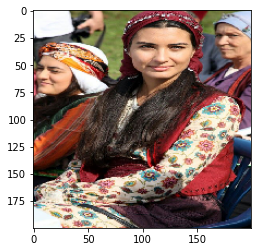

not masked


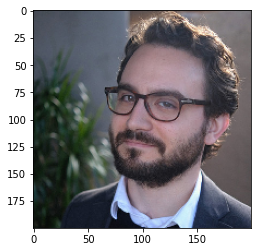

not masked


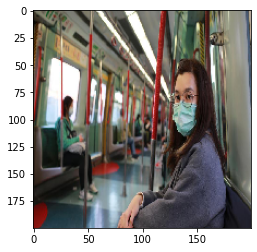

masked


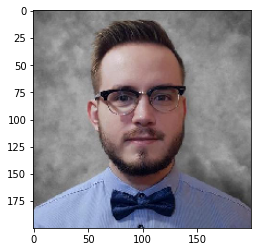

not masked


In [23]:
from tensorflow.keras.preprocessing import image
test_path='/content/drive/My Drive/test'
for pic in os.listdir(test_path):
  img=image.load_img(test_path+"/"+pic,target_size=(200,200,3))
  plt.imshow(img)
  plt.show()
  x=image.array_to_img(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  prediction=model.predict(images)
  if (prediction==0):
    print('masked')
  else:
    print('not masked')

